In [171]:
import librosa
import os
import numpy as np
import random

import matplotlib.pyplot as plt
from unidecode import unidecode

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.feature_extraction.text import CountVectorizer

In [172]:
def processAudioFolder(inputFolder, outputFolder, featureType):
    os.makedirs(outputFolder, exist_ok=True)

    for file in os.listdir(inputFolder):
        if file.endswith(".wav"):
            audioPath = os.path.join(inputFolder, file)

            audio, sr = librosa.load(audioPath, sr = None)

            if featureType == "spectrogram":
                features = librosa.feature.melspectrogram(y=audio, sr=sr)
            elif featureType == "mfcc":
                features = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            else:
                raise ValueError("Unknown feature type. Spectogram or MFCC")
            
            outputFilename = os.path.splitext(file)[0] + f"_{featureType}.npy"
            outputPath = os.path.join(outputFolder, outputFilename)
            np.save(outputPath, features)

In [173]:
inputFolderPath = "lingala/train/audio"
outputFolderPath = "lingala/train/features"

chosenFeatureType = input(str("Choose a feature type: "))

processAudioFolder(inputFolderPath, outputFolderPath, chosenFeatureType)

ValueError: Unknown feature type. Spectogram or MFCC

In [ ]:
inputFolderPath = "lingala/train/audio"
outputFolderPath = "lingala/train/features"

chosenFeatureType = input(str("Choose a feature type: "))

processAudioFolder(inputFolderPath, outputFolderPath, chosenFeatureType)

In [ ]:
inputFolderPath = "lingala/train/audio"
outputFolderPath = "lingala/train/features"

chosenFeatureType = input(str("Choose a feature type: "))

processAudioFolder(inputFolderPath, outputFolderPath, chosenFeatureType)

In [ ]:
speakers = ["yan", "rozenn", "rosine", "richard", "rebecca", "maswa", "kev", "kerene", "kapinga", "kangamotema", "gael", "florent", "exauce", "emma", "edimon", "david", "celestine", "betty"]

mfccFolder = "lingala/train/features"

selectedFiles = {}

for speaker in speakers:
    mfccFiles = [file for file in os.listdir(mfccFolder) if file.endswith(".npy") and file.startswith(speaker)]

    if mfccFiles:
        selectedFile = random.choice(mfccFiles)
        selectedFiles[speaker] = selectedFile

In [ ]:
print(selectedFiles)

print(type(selectedFiles))

{'yan': 'yan3_220717-171923_lin_9f7_elicit_148_mfcc.npy', 'rozenn': 'rozenn2_220716-142045_lin_9f7_elicit_61_mfcc.npy', 'rosine': 'rosine_221011-134013_lin_359_elicit_123_mfcc.npy', 'richard': 'richard2_221010-133212_lin_359_elicit_71_mfcc.npy', 'rebecca': 'rebecca_221011-120830_lin_359_elicit_120_mfcc.npy', 'maswa': 'maswa_221010-160522_lin_359_elicit_58_mfcc.npy', 'kev': 'kev_221010-150830_lin_359_elicit_98_mfcc.npy', 'kerene': 'kerene_221011-105639_lin_359_elicit_40_mfcc.npy', 'kapinga': 'kapinga_220729-181116_lin_9f7_elicit_17_mfcc.npy', 'kangamotema': 'kangamotema_221011-145514_lin_359_elicit_85_mfcc.npy', 'gael': 'gael_221011-100507_lin_359_elicit_130_mfcc.npy', 'florent': 'florent_221011-173945_lin_359_elicit_15_mfcc.npy', 'exauce': 'exauce1_221010-164503_lin_359_elicit_100_mfcc.npy', 'emma': 'emma_221010-142655_lin_359_elicit_6_mfcc.npy', 'edimon': 'edimon_221010-123027_lin_359_elicit_29_mfcc.npy', 'david': 'david_221011-142032_lin_359_elicit_65_mfcc.npy', 'celestine': 'celesti

18


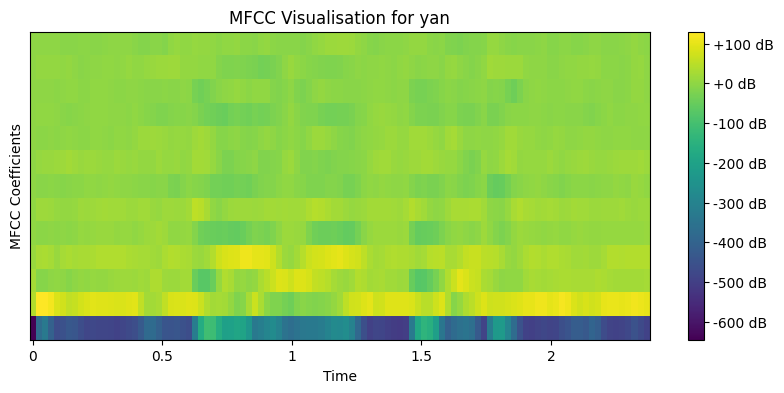

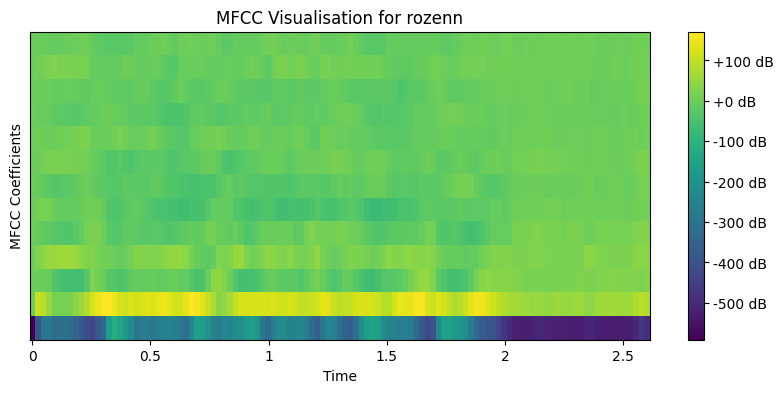

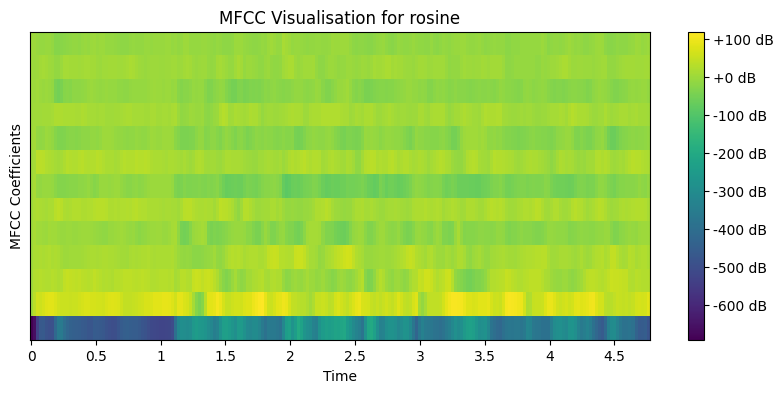

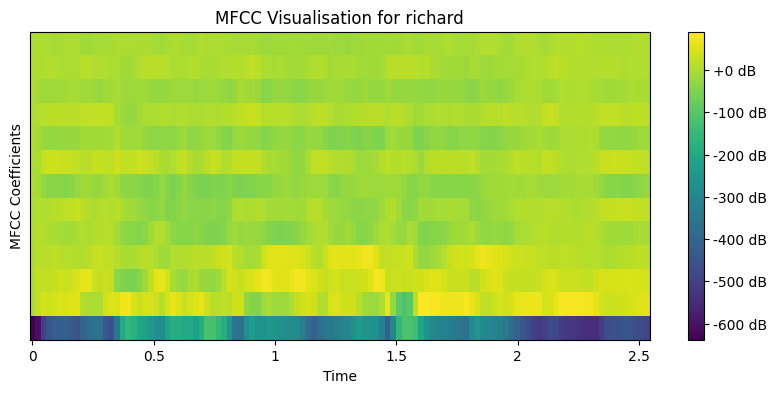

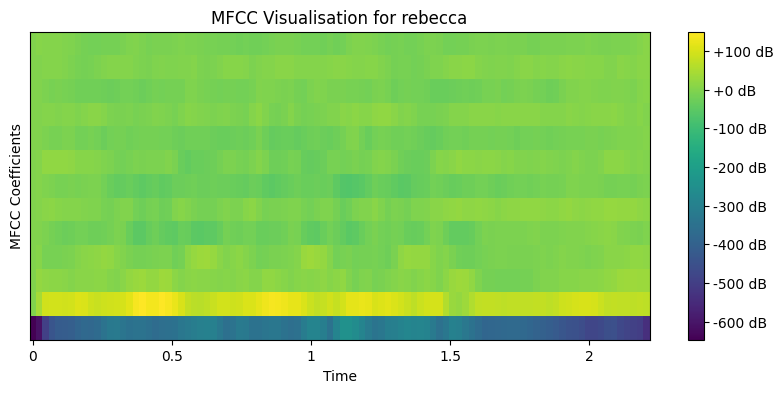

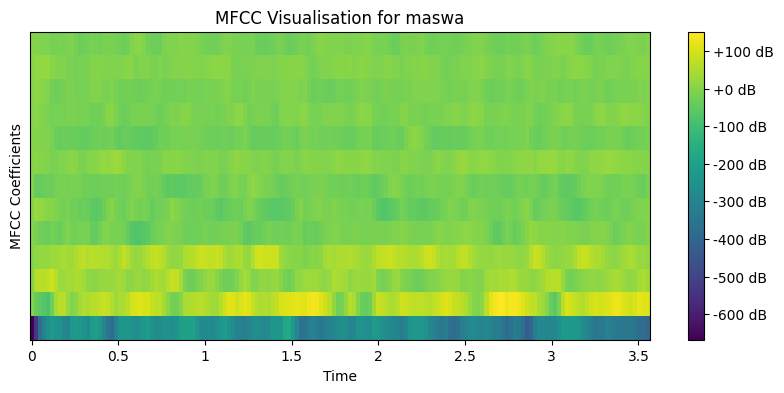

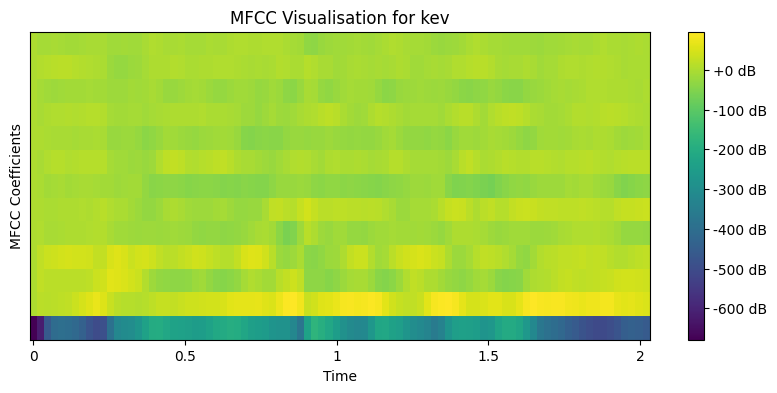

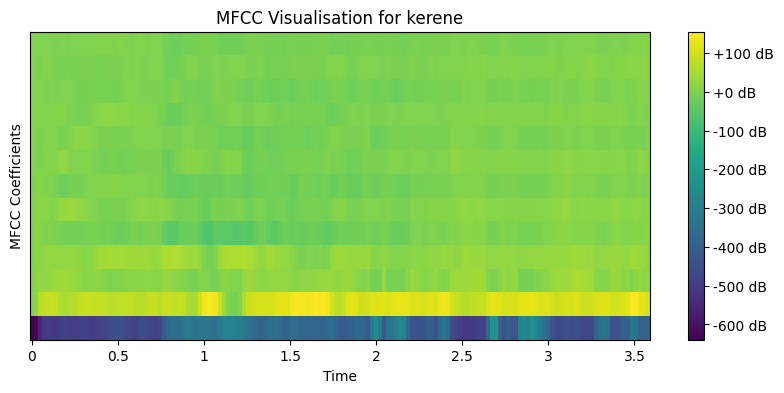

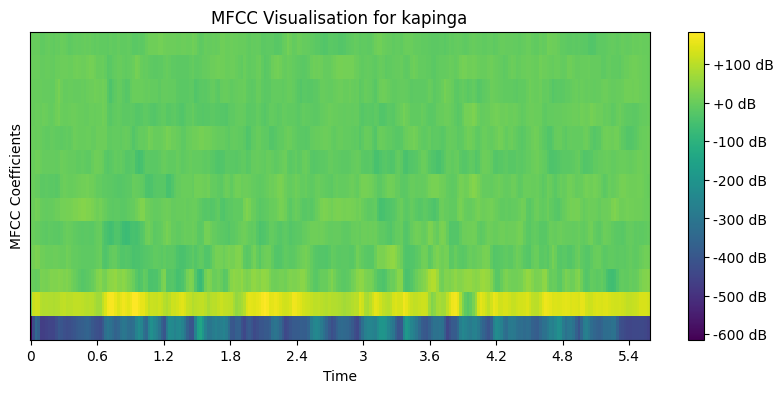

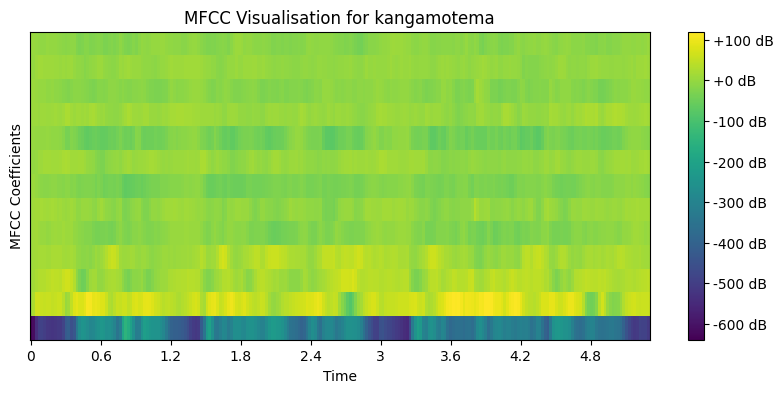

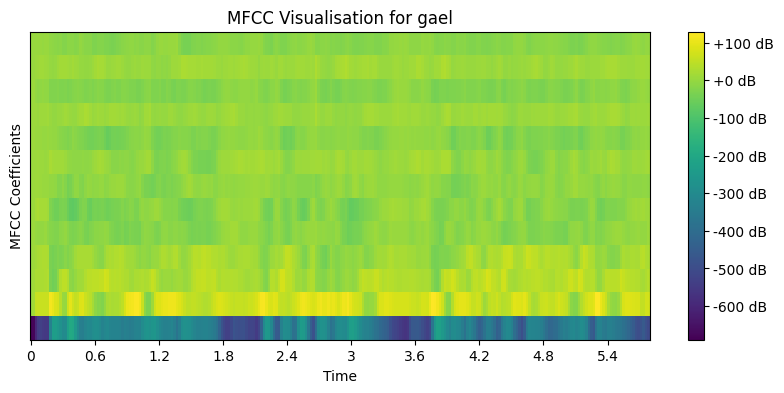

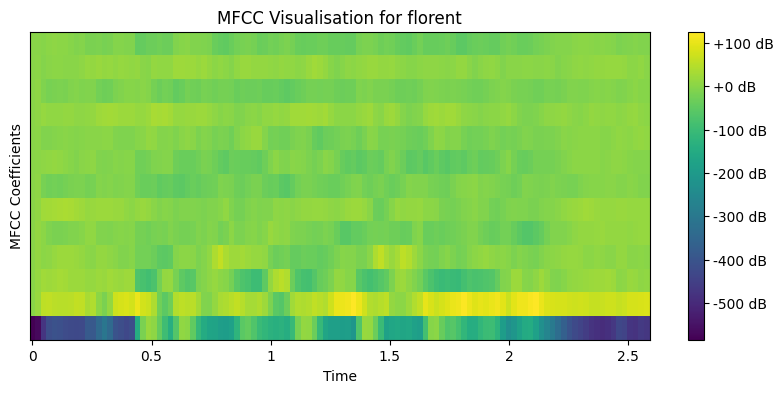

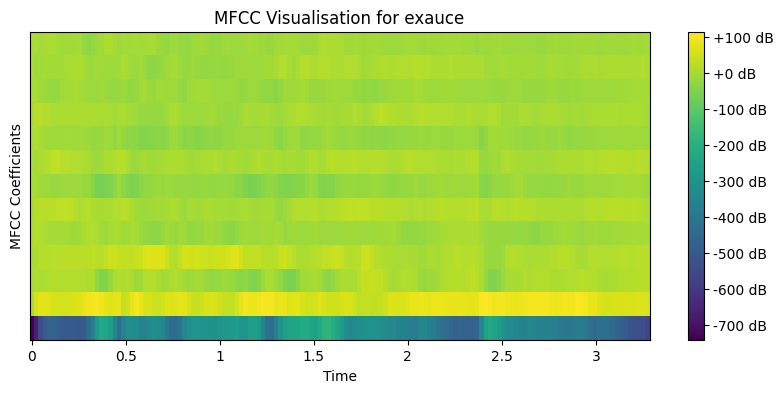

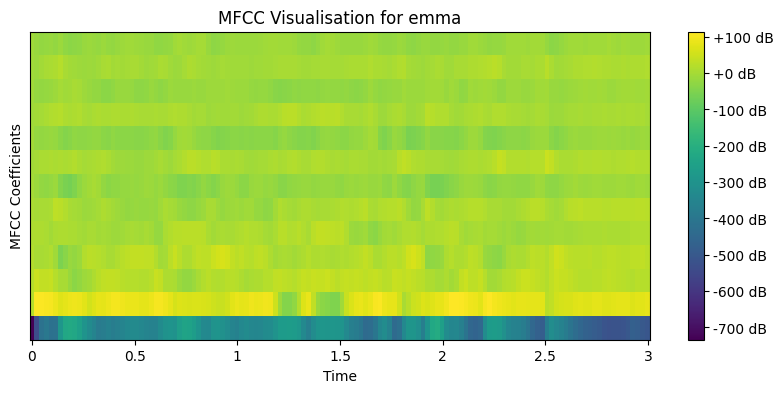

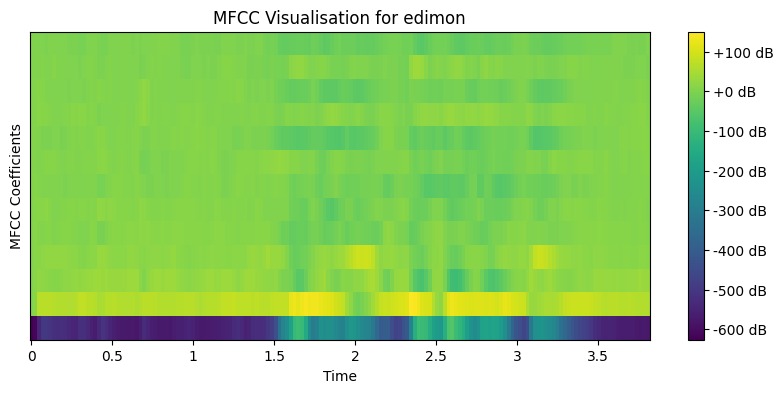

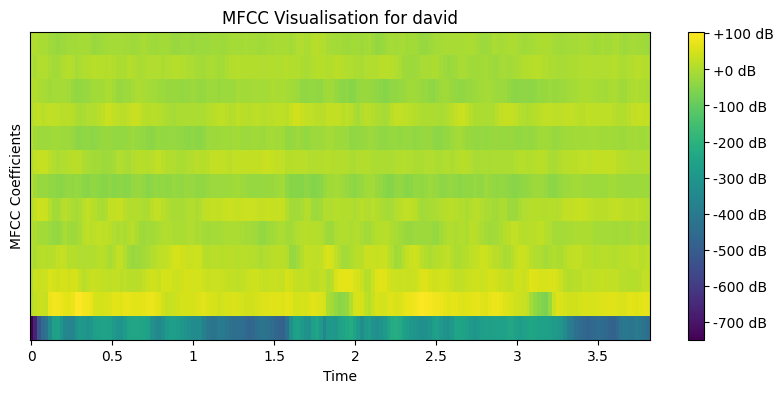

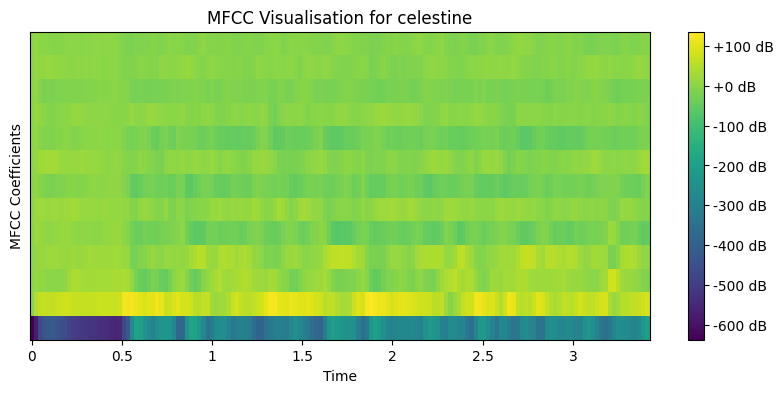

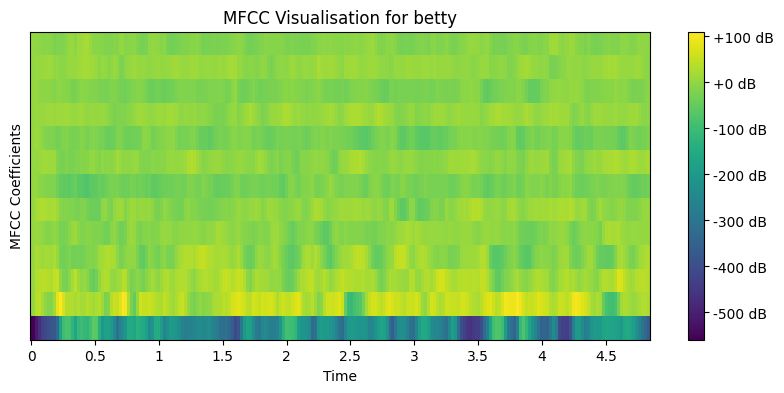

In [ ]:
def visualiseMfcc(filePath, speakerName):
    mfcc = np.load(filePath)

    plt.figure(figsize=(10,4))
    librosa.display.specshow(mfcc, x_axis="time", cmap="viridis")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"MFCC Visualisation for {speakerName}")
    plt.xlabel("Time")
    plt.ylabel("MFCC Coefficients")
    plt.show()


print(len(selectedFiles))

for speaker, fileName in selectedFiles.items():
    filePath = os.path.join(mfccFolder, fileName)

    visualiseMfcc(filePath, speaker)


In [182]:
transcriptFolder = "lingala/train/"

transcriptAudioDict = {}

transcriptFiles = os.listdir(transcriptFolder)

transcriptPath = os.path.join(transcriptFolder, "transcript.txt")

with open(transcriptPath, 'r', encoding="utf-8") as file:
    lines = file.readlines()

for lineNumber, line in enumerate(lines):
    audioFileName = line.split(" ", 1)[0] + ".wav"

    transcript = line.split(" ", 1)[1]
    transcript = transcript.strip("\n")

    transcriptAudioDict[audioFileName] = unidecode(transcript)

In [183]:
print(transcriptAudioDict)

{'betty_221011-125449_lin_359_elicit_0.wav': 'moto oyo azongiseli ye ete ekosala eloko moko te', 'betty_221011-125449_lin_359_elicit_1.wav': 'nazali na machine', 'betty_221011-125449_lin_359_elicit_10.wav': 'amituni bazalaki kotiya bakatini boni ya mayi', 'betty_221011-125449_lin_359_elicit_100.wav': 'fkm akamwe na mindele pe basalaka coop', 'betty_221011-125449_lin_359_elicit_101.wav': 'moto yango ayebisi ye ebongo yo okanisi coop ewuta wapi', 'betty_221011-125449_lin_359_elicit_102.wav': 'mpo na kokotisa badossier na ambassade ya belgique ezalaki nde likambo', 'betty_221011-125449_lin_359_elicit_103.wav': 'bokoya na ntongo makasi', 'betty_221011-125449_lin_359_elicit_104.wav': 'mpe bakoyamba bobele bato tuku mibale na mokolo moko', 'betty_221011-125449_lin_359_elicit_105.wav': 'bamisusu bozonga lobi', 'betty_221011-125449_lin_359_elicit_106.wav': 'mokolo ya liboso fkm akomi wana na ba six heure ya ntongo', 'betty_221011-125449_lin_359_elicit_107.wav': 'akuti deja bato vingt basi bako

In [ ]:
print(transcriptAudioDict["betty_221011-125449_lin_359_elicit_2.wav"])

zela nasilisa kotala makambo ya zelo nde natali likambo na yo


In [177]:
transcriptFolderValid = "lingala/valid/"

transcriptAudioDictValid = {}

transcriptFilesValid = os.listdir(transcriptFolderValid)

transcriptPathValid = os.path.join(transcriptFolderValid, "transcript.txt")

with open(transcriptPathValid, 'r', encoding="utf-8") as file:
    lines = file.readlines()

for lineNumber, line in enumerate(lines):
    audioFileNameValid = line.split(" ", 1)[0] + ".wav"

    transcriptValid = line.split(" ", 1)[1]
    transcriptValid = transcriptValid.strip("\n")

    transcriptAudioDictValid[audioFileNameValid] = unidecode(transcriptValid)
          

In [178]:
print(transcriptAudioDictValid)

{'deborah_220718-132354_lin_9f7_elicit_10.wav': 'lelo oyo ozokufa nazotala te', 'deborah_220718-132354_lin_9f7_elicit_11.wav': 'ekomeli ngai boni', 'deborah_220718-132354_lin_9f7_elicit_12.wav': 'motema libanga nazwi wapi', 'deborah_220718-132354_lin_9f7_elicit_14.wav': 'dongolomiso basilisi bato na koboma mpinzoli te', 'deborah_220718-132354_lin_9f7_elicit_15.wav': 'nzoto ya mwasi ekomi eyinelo nakosoli te', 'deborah_220718-132354_lin_9f7_elicit_16.wav': 'bana basili na kokufa ngai matoyi lokola ezosala te', 'deborah_220718-132354_lin_9f7_elicit_17.wav': 'naweli bokonzi na kisasa nazwi tango te ya kobatela yo', 'deborah_220718-132354_lin_9f7_elicit_18.wav': 'naluki butu na moyi babenga ngai excellence ye oyo aleki na malonga', 'deborah_220718-132354_lin_9f7_elicit_19.wav': 'naluki na bikotakota babenga ngai honorable ye oyo abongi na lokumu liwa na yo nayokaki yango nabosanaki yango', 'deborah_220718-132354_lin_9f7_elicit_2.wav': 'liboso motuka ekoma miso ya jeannine ezotala ndenge ta

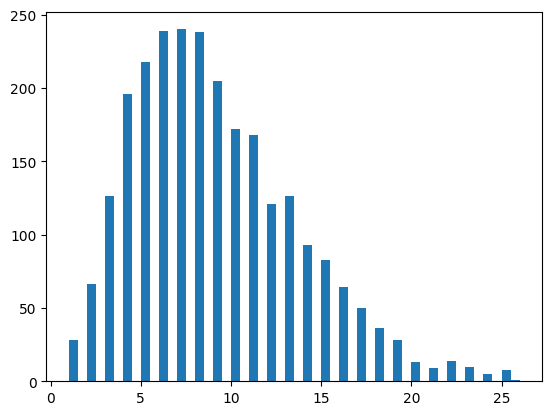

26


In [ ]:
sequenceLengths = [len(transcript.split()) for transcript in transcriptAudioDict.values()]

plt.hist(sequenceLengths, bins=50)
plt.show()

sequenceLengths.sort()
print(sequenceLengths[-1])

In [ ]:
tokenizer = Tokenizer()

def processTranscript(audioDictionary):
    transcripts = list(audioDictionary.values())

    # transcripts = [str(transcript) for transcript in transcripts]

    tokenizer.fit_on_texts(transcripts)

    encodedTranscripts = tokenizer.texts_to_sequences(transcripts)

    maxLength = max(sequenceLengths) + 4

    paddedTranscripts = pad_sequences(encodedTranscripts, maxlen = maxLength, padding ="post")
                                       
    return paddedTranscripts
    
processedTranscriptTrain = processTranscript(transcriptAudioDict)
processedTranscriptValid = processTranscript(transcriptAudioDictValid)

print(processedTranscriptTrain)
print(processedTranscriptValid)

[ 17   5 185   3  16 732  88   8   4   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
[[  67    5 3682 ...    0    0    0]
 [1200    7  229 ...    0    0    0]
 [  66  663 1107 ...    0    0    0]
 ...
 [ 159 4055    1 ...    0    0    0]
 [ 681   95  238 ...    0    0    0]
 [ 259  169  316 ...    0    0    0]]


In [ ]:
processedTranscriptValid

array([[  85,    6,  389, ...,    0,    0,    0],
       [ 391,    9,  392, ...,    0,    0,    0],
       [  44,  393,  221, ...,    0,    0,    0],
       ...,
       [ 318, 1096,    1, ...,    0,    0,    0],
       [1099,   38,  170, ...,    0,    0,    0],
       [1102,   26,  162, ...,    0,    0,    0]], dtype=int32)

In [203]:
print(processedTranscriptTrain[0])

[ 17   5 185   3  16 732  88   8   4   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]


In [186]:
print(transcriptAudioDict)
print(transcriptAudioDictValid)

{'betty_221011-125449_lin_359_elicit_0.wav': 'moto oyo azongiseli ye ete ekosala eloko moko te', 'betty_221011-125449_lin_359_elicit_1.wav': 'nazali na machine', 'betty_221011-125449_lin_359_elicit_10.wav': 'amituni bazalaki kotiya bakatini boni ya mayi', 'betty_221011-125449_lin_359_elicit_100.wav': 'fkm akamwe na mindele pe basalaka coop', 'betty_221011-125449_lin_359_elicit_101.wav': 'moto yango ayebisi ye ebongo yo okanisi coop ewuta wapi', 'betty_221011-125449_lin_359_elicit_102.wav': 'mpo na kokotisa badossier na ambassade ya belgique ezalaki nde likambo', 'betty_221011-125449_lin_359_elicit_103.wav': 'bokoya na ntongo makasi', 'betty_221011-125449_lin_359_elicit_104.wav': 'mpe bakoyamba bobele bato tuku mibale na mokolo moko', 'betty_221011-125449_lin_359_elicit_105.wav': 'bamisusu bozonga lobi', 'betty_221011-125449_lin_359_elicit_106.wav': 'mokolo ya liboso fkm akomi wana na ba six heure ya ntongo', 'betty_221011-125449_lin_359_elicit_107.wav': 'akuti deja bato vingt basi bako

In [204]:
# transcriptAudioDict
# transcriptAudioDictValid

def replaceValues(dictionary, newValue):
    newDictionary = {}

    for key, value in dictionary.items():
        newDictionary[key] = value

    for i, (key,_) in enumerate(newDictionary.items()):
        if i < len(newDictionary):
            newDictionary[key] = newValue[i]

    return newDictionary

transcriptAudioDict = replaceValues(transcriptAudioDict, processedTranscriptTrain)
transcriptAudioDictValid = replaceValues(transcriptAudioDictValid, processedTranscriptValid)

{'betty_221011-125449_lin_359_elicit_0.wav': array([ 17,   5, 185,   3,  16, 732,  88,   8,   4,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0], dtype=int32),
 'betty_221011-125449_lin_359_elicit_1.wav': array([ 84,   1, 496,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0], dtype=int32),
 'betty_221011-125449_lin_359_elicit_10.wav': array([1003,   38,  215, 1642,  216,    2,  125,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
 'betty_221011-125449_lin_359_elicit_100.wav': array([  33, 1004,    1,  497,    7,  498,  499,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
 'bet

In [ ]:
dictionaryTest = {"Moses" : "Makola", "Lawrence" : "Siuu", "Hannah" : "Yes"}

print(dictionaryTest)

print(dictionaryTest["Moses"])

{'Moses': 'Makola', 'Lawrence': 'Siuu', 'Hannah': 'Yes'}
Makola


In [195]:
dictionary1 = {'key1': 'value1', 'key2': 'value2', 'key3': 'value3'}
dictionary2 = {}
list1 = ["Siuu", "YESSS", "YESSSSSS"]

# Copy values from dictionary1 to dictionary2
for key, value in dictionary1.items():
    dictionary2[key] = value

# Modify values in dictionary2 using list1
for i, (key, _) in enumerate(dictionary2.items()):
    if i < len(list1):
        dictionary2[key] = list1[i]

# Print both dictionaries
print("Dictionary 1:", dictionary1)
print("Dictionary 2:", dictionary2)

Dictionary 1: {'key1': 'value1', 'key2': 'value2', 'key3': 'value3'}
Dictionary 2: {'key1': 'Siuu', 'key2': 'YESSS', 'key3': 'YESSSSSS'}


In [242]:
print(transcriptAudioDictValid)

{'deborah_220718-132354_lin_9f7_elicit_10.wav': array([  67,    5, 3682, 3683,    4,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32), 'deborah_220718-132354_lin_9f7_elicit_11.wav': array([1200,    7,  229,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32), 'deborah_220718-132354_lin_9f7_elicit_12.wav': array([  66,  663, 1107,  166,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32), 'deborah_220718-132354_lin_9f7_elicit_14.wav': array([3684,  857,   20,    1, 1796, 3685,    4,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0

In [210]:
print(transcriptAudioDict)

{'betty_221011-125449_lin_359_elicit_0.wav': array([ 17,   5, 185,   3,  16, 732,  88,   8,   4,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0], dtype=int32), 'betty_221011-125449_lin_359_elicit_1.wav': array([ 84,   1, 496,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0], dtype=int32), 'betty_221011-125449_lin_359_elicit_10.wav': array([1003,   38,  215, 1642,  216,    2,  125,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32), 'betty_221011-125449_lin_359_elicit_100.wav': array([  33, 1004,    1,  497,    7,  498,  499,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32), 'betty_221011-12

In [211]:
def processAudioFolder(inputFolder, outputFolder, featureType):
    os.makedirs(outputFolder, exist_ok=True)

    for file in os.listdir(inputFolder):
        if file.endswith(".wav"):
            audioPath = os.path.join(inputFolder, file)

            audio, sr = librosa.load(audioPath, sr = None)

            if featureType == "spectrogram":
                features = librosa.feature.melspectrogram(y=audio, sr=sr)
            elif featureType == "mfcc":
                features = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            else:
                raise ValueError("Unknown feature type. Spectogram or MFCC")
            
            outputFilename = os.path.splitext(file)[0] + f"_{featureType}.npy"
            outputPath = os.path.join(outputFolder, outputFilename)
            np.save(outputPath, features)

inputFolderPath = "lingala/valid/audio"
outputFolderPath = "lingala/valid/features"

chosenFeatureType = input(str("Choose a feature type: "))

processAudioFolder(inputFolderPath, outputFolderPath, chosenFeatureType)

In [212]:
def normaliseMfcc(mfccFeatures):
    # Compute mean and standard deviation along each coefficient dimension
    mean = np.mean(mfccFeatures, axis=0)
    standardDeviation = np.std(mfccFeatures, axis=0)

    # Normalize each coefficient dimension
    normalisedMfcc = (mfccFeatures - mean) / standardDeviation

    return normalisedMfcc

In [247]:
def createMfccArray(mfccFolder, mode):
    mfccArray = [file for file in os.listdir(mfccFolder) if file.endswith(".npy")]

    for i in range(len(mfccArray)):
        mfccPath= os.path.join(mfccFolder, mfccArray[i])
        mfccArray[i] = np.load(mfccPath)

    if mode == "valid":
        validMfcc = mfccArray
        return validMfcc
    elif mode == "train":
        trainMfcc = mfccArray
        return trainMfcc
    else:
        raise ValueError("Unknown mode. train or valid")


trainMfcc = createMfccArray("lingala/train/mfcc", "train")
validMfcc = createMfccArray("lingala/valid/mfcc", "valid")

In [229]:
def longestItem(array):
    longestNum = array[0]

    for sublist in array:
        for item in sublist:
            if len(str(item)) < len(str(longestNum)):
                longestNum = item

    return len(str(longestNum))

print(longestItem(trainMfcc))
print(longestItem(validMfcc))

# 8954
# Shortest is 335


635
635


In [248]:
def normaliseMfcc(mfccArray):
    maxColumns = max(array.shape[1] for array in mfccArray)

    paddedMfccArray = [np.pad(arr, ((0, 0), (0, maxColumns - arr.shape[1])), mode='constant') if arr.shape[1] < maxColumns else arr[:, :maxColumns] for arr in mfccArray]

    concatenatedMfcc = np.concatenate(paddedMfccArray, axis = 0)

    mean = np.mean(concatenatedMfcc, axis = 0)
    standardDeviation = np.std(concatenatedMfcc, axis = 0)

    normalisedConcatenatedMfcc = (concatenatedMfcc - mean) / standardDeviation

    normalisedMfccArray = np.split(normalisedConcatenatedMfcc, len(mfccArray))

    return normalisedConcatenatedMfcc, normalisedMfccArray

normalisedTrainMfccConcatenated, normalisedTrainMfcc = normaliseMfcc(trainMfcc)
normalisedValidMfccConcatenated, normalisedValidMfcc = normaliseMfcc(validMfcc)


In [249]:
len(normalisedTrainMfcc)

2557

In [240]:
normalisedTrainMfccConcatenated

array([[-3.3455577 , -3.3853192 , -3.3608124 , ...,  0.01146099,
         0.01104917,  0.01074069],
       [ 0.27258736,  1.2420068 ,  1.4597975 , ...,  0.01146099,
         0.01104917,  0.01074069],
       [ 0.27258736,  0.144416  ,  0.05811902, ...,  0.01146099,
         0.01104917,  0.01074069],
       ...,
       [ 0.26812825,  0.13796882,  0.10012972, ...,  0.01146099,
         0.01104917,  0.01074069],
       [ 0.2678903 ,  0.18477474,  0.17146607, ...,  0.01146099,
         0.01104917,  0.01074069],
       [ 0.26636583,  0.15594226,  0.12005871, ...,  0.01146099,
         0.01104917,  0.01074069]], dtype=float32)

In [250]:
mfccTrainDict = replaceValues(transcriptAudioDict, normalisedTrainMfcc)
mfccValidDict = replaceValues(transcriptAudioDictValid, normalisedValidMfcc)

{'betty_221011-125449_lin_359_elicit_0.wav': array([ 17,   5, 185,   3,  16, 732,  88,   8,   4,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0], dtype=int32),
 'betty_221011-125449_lin_359_elicit_1.wav': array([ 84,   1, 496,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0], dtype=int32),
 'betty_221011-125449_lin_359_elicit_10.wav': array([1003,   38,  215, 1642,  216,    2,  125,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
 'betty_221011-125449_lin_359_elicit_100.wav': array([  33, 1004,    1,  497,    7,  498,  499,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
 'bet

In [254]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

X_train = np.array(list(mfccTrainDict.values()))
X_valid = np.array(list(mfccValidDict.values()))

y_train = np.array(list(transcriptAudioDict.values()))
y_valid = np.array(list(transcriptAudioDictValid.values()))

model = Sequential()